<a href="https://colab.research.google.com/github/dani1974/DanielaRosasPUC/blob/main/Sprint2_MVP2_1_Daniela_Rosas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SPRINT 2 - MVP 1 - PROBLEMA DE CLASSIFICAÇÃO**
#####**ALUNA - DANIELA ROSAS**

###**1. Definição do Problema**

  1.1. **Qual é a descrição do problema?**
  ##### Modelo de Machine Learning para prever quais pacientes, dentro do dataset, possuem doenças cardiovascularesou não possuem, Assim, é necessário que o modelo de Machine Learning dê uma classificação ao ser alimentado com diversas variáveis independentes (features).

  1.2.   **Você tem premissas ou hipóteses sobre o problema? Quais?**
  ##### 76 atributos. Contudo, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de Data Science usará essas mesmas 14 variáveis principais.

  1.3. **Que restrições ou condições foram impostas para selecionar os dados?**
  #####  conjunto de dados relativamente pequeno, o que dificulta a implementação do modelo.

  1.4.   **Descreva o seu dataset (atributos, imagens, anotações, etc).**

  *citação: Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.*

  **Nº de linhas**
  Cleveland: 303
  Hungarian: 294
  Switzerland: 123
  Long Beach VA: 200

  **Nº atributos:** 14 (including the predicted attribute)
  Attribute Information: somente 14 dos 76 atributos da amostra
  Informações sobre os atributos:

  age - idade em anos
  sex - sexo do paciente
  0: mulher
  1: homem
  cp - tipo da dor torácica
  1: angina típica
  2: angina atípica
  3: dor não cardíaca
  4: assintomática
  trestbps - pressão arterial em repouso
  chol - colesterol sérico (mg/dl)
  fbs - açucar no sangue em jejum > 120mg/dl
  0: False
  1: True
  restecg - resultado do eletrocardiografia de repouso
  0: normal
  1: anormalidades de ST-T (inversão da onda T e elevação ou depressão de > 0.05mV)
  2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
  thalach - frequência cardíaca máxima atingida
  exang - angina induzida pelo exercício
  0: não
  1: sim
  oldpeak - depessão do segmento ST induzida pelo exercício em relação ao repouso
  slope - inclinação do segmento ST no pico do exercício
  ca - número de vasos principais colorido por fluoroscopia
  thal - teste de esforço cardíaco
  3: normal
  6: defeito fixo
  7: defeito reversível
  num - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)




### **Preparação de Dados**

In [182]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [181]:
# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine # para importar o dataset wine
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

## **Carregando o Dataset = Doenças**

In [118]:

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/dani1974/DanielaRosasPUC/main/Dados/DADOS_DOENCASVASCULARES.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## **Tratando a base**

In [119]:
# igualando a 1 os valores compreendidos entre 1-4.

dataset.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [120]:
# convertendo os valores que são maiores ou iguais a 1 para 1.

dataset.loc[dataset.num != 0, 'num'] = 1

In [121]:
# resultado do tratamento do target
dataset.num.value_counts()

0    164
1    139
Name: num, dtype: int64

# **Análise Exploratória**

In [122]:
# tamanho do dado

print('Linhas: {}'.format(dataset.shape[0]))
print('Colunas: {}'.format(dataset.shape[1]))

Linhas: 303
Colunas: 14


In [123]:
# tipo de variaveis

dataset.dtypes
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [124]:
# Verifica a distribuição das classes
dataset.groupby('num').size()

num
0    164
1    139
dtype: int64

**O histograma** é fundamental para enterder a distribuição de uma determinada variável dentro do conjunto de dados.

  age - idade em anos -  Apresenta maior frequência de idades entre 50 a 65 anos

  sex - sexo do paciente - ilustra perfeitamento 2 grupos distintos,
  0: mulher
  1: homem

  cp - tipo da dor torácica - ilustra perfeitamento 4 grupos distintos,
  1: angina típica
  2: angina atípica
  3: dor não cardíaca
  4: assintomática

  trestbps - pressão arterial em repouso -  Apresenta maior frequência para valores entre 200 e 300 mg/dL.

  chol - colesterol sérico (mg/dl) - Apresenta maior frequência para valores entre 120 e 130

  fbs - açucar no sangue em jejum > 120mg/dl - ilustra perfeitamento 2 grupos distintos
  0: False
  1: True

  restecg - resultado do eletrocardiografia de repouso - ilustra perfeitamento 3 grupos distintos
  0: normal
  1: anormalidades de ST-T (inversão da onda T e elevação ou depressão de > 0.05mV)
  2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)

  thalach - frequência cardíaca máxima atingida - ilustra perfeitamento 2 grupos distintos
  exang - angina induzida pelo exercício
  0: não
  1: sim

  oldpeak - depessão do segmento ST induzida pelo exercício em relação ao repouso - apresenta maior frequencia no intervalo menor que 1

  slope - inclinação do segmento ST no pico do exercício - ilustra perfeitamento 3 grupos distintos

  ca - número de vasos principais colorido por fluoroscopia - ilustra perfeitamento 4 grupos distintos

  thal - teste de esforço cardíaco - ilustra perfeitamento 3 grupos distintos
  3: normal
  6: defeito fixo
  7: defeito reversível

  num - diagnóstico de doença cardíaca (diagnóstico angiográfico) - Target - 2 grupos distintos
  0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

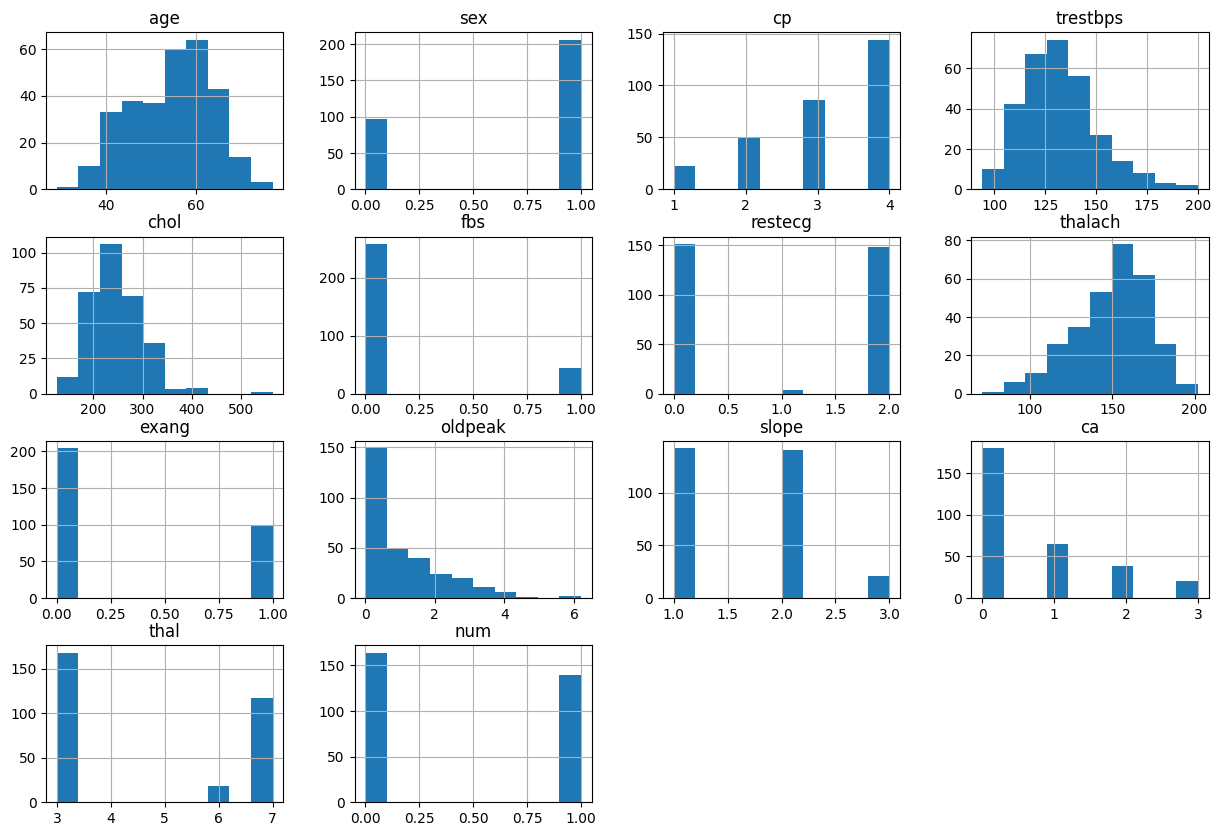

In [125]:
# Histograma
dataset.hist(figsize = (15,10))
plt.show()

In [126]:
# valores faltantes

dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

**O mapa abaixo ilustra a correlação entre as variáveis**

Assim, podemos observar que as variáveis com a maior correlação são oldpeak e slope , com valor de 0,58. Enquanto a menor correlação existente, - 0,42, é entre as variáveis num e thalach

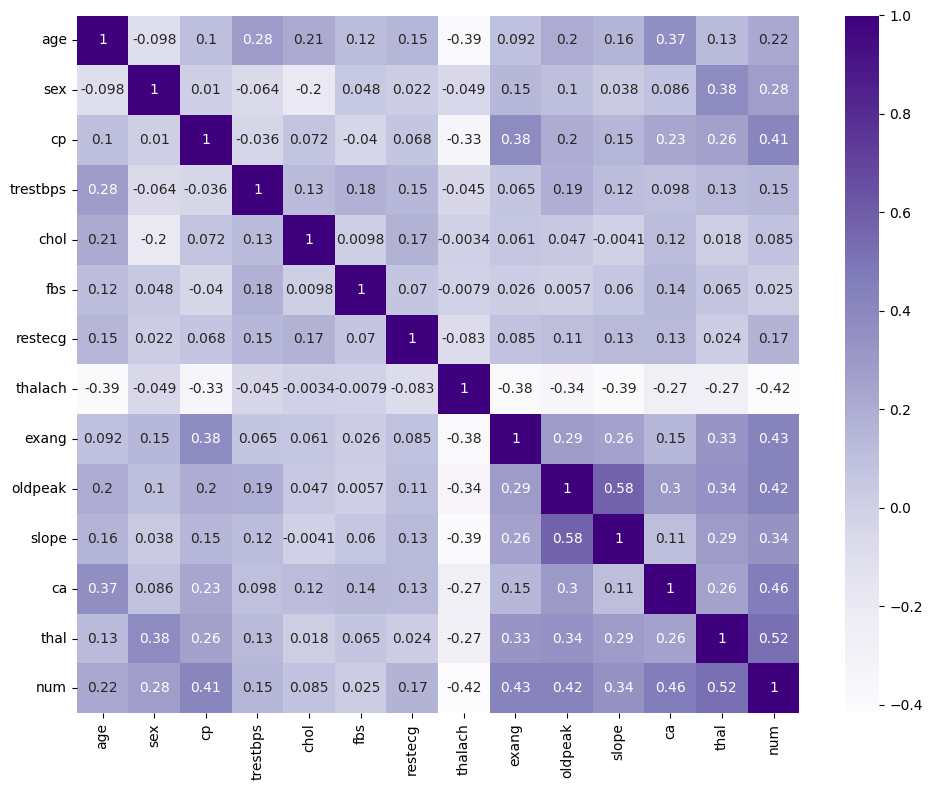

In [25]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(dataset.corr() , fmt= '.2g', cmap = 'Purples', annot= True )
plt.tight_layout()

# **2 - Modelagem e treinamento:**
### **Preparação dos Dados para o Modelo de Regressão**

In [141]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

 **Separação em bases de treino e teste (holdout).**

In [129]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:13] # atributos
y = array[:,13] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão



 **Validação cruzada**

 Nossos dados de treino foram divididos em 5 partes ( folds ).

A 1ª rodada do modelo é treinado utilizando os folds 2, 3, 4 e 5 e o teste é feito com o fold 1, o segundo modelo é treinado utilizando os folds 1, 3, 4 e 5 e testado no fold 2, e assim sucessivamente.

In [130]:
# Criando os folds para a validação cruzada
num_particoes = 5 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 5 folds

KNN: 0.648554 (0.045024)
RF1: 0.839031 (0.044907)
RF2: 0.826616 (0.055436)
RF3: 0.851531 (0.049992)
CART1: 0.777126 (0.038371)
CART2: 0.769133 (0.067504)
CART3: 0.748469 (0.060784)
NB: 0.830612 (0.050722)
SVM1: 0.615816 (0.047450)
SVM2: 0.839116 (0.051893)


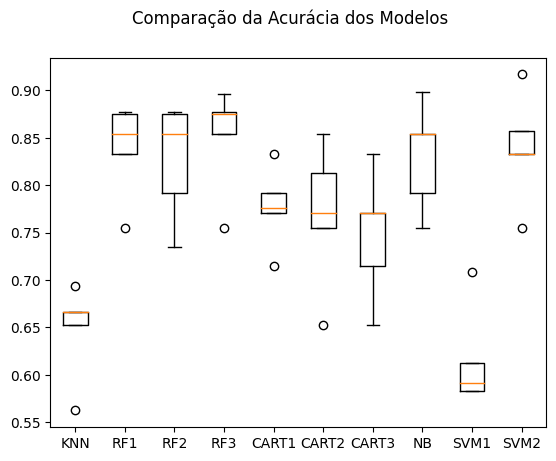

In [171]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF1', RandomForestClassifier()))
models.append(('RF2', RandomForestClassifier(n_estimators = 50)))
models.append(('RF3', RandomForestClassifier(n_estimators = 100)))
models.append(('CART1', DecisionTreeClassifier(max_depth=3)))
models.append(('CART2', DecisionTreeClassifier(max_depth=5)))
models.append(('CART3', DecisionTreeClassifier(max_depth=1)))
models.append(('NB', GaussianNB()))
models.append(('SVM1', SVC()))
models.append(('SVM2',LogisticRegression(solver='liblinear')))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 5 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


##**2.Modelo escolhido**

**2.1. Selecione os algoritmos mais indicados para o problema e dataset escolhidos, justificando as suas escolhas**.

R: Modelo escolhido dentre os 5 modelos de classificação, foi o modelo com o algoritmo RF3 = RandomForestClassifier(n_estimators = 100)

Random Forest (floresta aleatória) é um algoritmo de aprendizagem supervisionada.  o algoritmo de florestas aleatórias cria várias árvores de decisão e as combina para obter uma predição com maior acurácia e mais estável.

Uma grande vantagem do algoritmo de florestas aleatórias é que ele pode ser utilizado tanto para tarefas de classificação quanto para regressão, o que representa a maioria dos sistemas de aprendizagem de máquina atuais.


**2.2. Há algum ajuste inicial para os hiperparâmetros?**

R: Nâo


In [154]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [177]:
# Criando um modelo com todo o conjunto de treino
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
y_pred = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, y_pred))


0.819672131147541


## **Verificando o desempenho do modelo**

In [179]:
# VISUALIZANDO O CLASSIFICATION REPORT

print('\n[Classification Report] Random Forest')

print(classification_report(y_test, y_pred))


[Classification Report] Random Forest
              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82        29
         1.0       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



**Descrição das métricas**

**Precision** - Precisão de previsões positivas..

**Reacall -** Fração de positivos que foram identificados corretamente.

**f1-score -** representa a média harmonica entre precision e recall, sendo 0 o pior valor e 1 o melhor.

Aparentemente, o modelo apresenta bons resultados nas métricas avaliadas. Contudo, como citado anteriormente, isso não pode garantir totalmente que o modelo seja bom.

Para complementar a nossa análise de desempenho, é interessante visualizar a matriz de confusão

**VP** - Se o paciente tiver doença cardíaca e o modelo prever que tem doença cardíaca.  (++)

**FP**- Se o paciente não tiver doença cardíaca e o modelo prever que tem doença cardíaca. (-+)

**FN**- Se o paciente tiver doença cardíaca e o modelo prever que não tem doença cardíaca.(+-)

**VN**- Se o paciente não tiver doença cardíaca e o modelo prever que não tem doença cardíaca.(--)


In [180]:
# Visualizando a Matriz de confusão

pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['neg', 'pos'], columns=['pred_neg', 'pred_pos'])

,pred_neg,pred_pos
neg,25,4
pos,7,25


**A matriz de confusão:**

O modelo acertou 25 casos que realmente o paciente não apresenta doença cardíaca, sendo 4 casos classificados pelo modelo como tendo doença cardíaca, sendo que não deveriam ter.

O modelo acertou 25 casos que realmente o paciente apresenta doença cardíaca, sendo 7 classificado pelo modelo como não tendo doença cardíaca sendo que tem.


## **Conclusões - Modelo de Machine Learning**

O modelo desenvolvido neste projeto conseguiu uma acurácia de 82%, ou seja, a cada 10 pacientes, o modelo conseguiu prever pelo menos 8 casos corretamente.

Como o modelo classificou corretamente o maior números de casos falsos negativos(FN-27) que falsos positivos(FP-23), e como se trata de um modelo de previsão de diagnostico de doenças, deveria ter um crivo maior para as classificações como FP, pois esses resultados teria um impacto maior no tratamento do indivíduo levando a complicações e outras doenças futuramente, por ausência de cuidados.

No caso da detecção de doenças cardiovasculares, o interesse é maximizar o número de verdadeiros positivos e minimizar o número de falsos negativos, apesar de ser uma tarefa difícil de realizar.

